In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing advertising data set

adv = pd.read_csv('advertising.csv')

In [3]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
#test train split
from sklearn.model_selection import train_test_split
df_train, df_test= train_test_split(adv, train_size = 0.7, test_size = 0.3, random_state = 100)

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scalar = MinMaxScaler() #scale only continous variables

In [7]:
num_vars = ['TV','Radio','Newspaper','Sales']

In [8]:
df_train[num_vars] = scalar.fit_transform(df_train[num_vars])

In [9]:
df_train.head()

,TV,Radio,Newspaper,Sales
74,0.719310,0.495968,0.112577,0.606299
3,0.509976,0.832661,0.511873,0.586614
185,0.690903,0.909274,0.169745,0.826772
26,0.480893,0.590726,0.108179,0.527559
90,0.451809,0.098790,0.079156,0.488189


In [10]:
df_train.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.030733,0.107995,0.903213
Radio,0.030733,1.000000,0.399794,0.334486
Newspaper,0.107995,0.399794,1.000000,0.240356
Sales,0.903213,0.334486,0.240356,1.000000


In [11]:
y_train = df_train.pop('Sales')
X_train = df_train

In [12]:
import statsmodels.api as sm   #import linearRegression 

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [13]:
lr.params

const        0.109219
TV           0.626664
Radio        0.214827
Newspaper    0.028156
dtype: float64

In [ ]:
Sales = 0.1 + TV*0.6+0.2*radio+0.02*Newspaper

In [14]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     461.2
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           4.73e-71
Time:                        16:09:43   Log-Likelihood:                 182.27
No. Observations:                 140   AIC:                            -356.5
Df Residuals:                     136   BIC:                            -344.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1092      0.014      7.796      0.000       0.082       0.137
TV             0.6267      0.018     34.539      0.000       0.591       0.663
Radio          0.2148      0.020     10.609      0.000       0.175       0.255
Newspaper      0.0282      0.031      0.902      0.369      -0.034       0.090
==============================================================================
Omnibus:                       18.669   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.404
Skew:                          -0.643   Prob(JB):                     1.52e-07
Kurtosis:                       4.932   Cond. No.                         7.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [16]:
# For each X_train, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["features"] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

In [17]:
vif.sort_values(by = 'VIF Factor', ascending=False).round(2)

,features,VIF Factor
2,Newspaper,3.23
1,Radio,3.20
0,TV,2.33


In [18]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('Newspaper',1)

In [19]:
# Build a third fitted model
X_train_lm2 = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm2).fit()

In [20]:
lr_2.params

const    0.112713
TV       0.628373
Radio    0.222113
dtype: float64

In [21]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     692.3
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           2.38e-72
Time:                        16:09:44   Log-Likelihood:                 181.85
No. Observations:                 140   AIC:                            -357.7
Df Residuals:                     137   BIC:                            -348.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1127      0.013      8.378      0.000       0.086       0.139
TV             0.6284      0.018     34.848      0.000       0.593       0.664
Radio          0.2221      0.019     11.970      0.000       0.185       0.259
==============================================================================
Omnibus:                       21.428   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.728
Skew:                          -0.716   Prob(JB):                     6.42e-09
Kurtosis:                       5.102   Cond. No.                         4.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#calculating the residues
y_train_pred = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

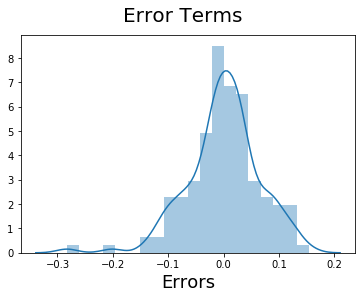

In [23]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [24]:
df_test[num_vars] = scalar.transform(df_test[num_vars])

In [25]:
y_test = df_test.pop('Sales')
X_test = df_test

In [26]:
# Adding constant variable to test dataframe
X_test_m1 = sm.add_constant(X_test)

In [27]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4
X_test_m1 = X_test_m1.drop(['Newspaper'], axis = 1)

In [28]:
# Making predictions using the fourth model
y_pred_m1 = lr_2.predict(X_test_m1)

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [30]:
#checking the accuracy
np.sqrt(mean_squared_error(y_test, y_pred_m1))

0.06281084774408185

In [31]:
r2_score(y_test,y_pred_m1)

0.870226906502254